<a href="https://colab.research.google.com/github/Shri-Aiswarya/NLP/blob/main/NLP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXERCISE_1

1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-
movie-reviews/data

2. Take a look at the data and get info about the data
3. Count the number of expressed sentiments by category
4. Provide a histogram of sentiments by category
5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers
6. Split dataset (the test dataset represents 30% of the total data).
7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.
8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.
9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10.Build the Text Classification Model using TF-IDF.
11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12.Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [2]:
#Loading the dataset
data= pd.read_csv('train.tsv', sep='\t')
#displaying first 10 rows
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
#Describing the dataset
data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [7]:
#Count the number of expressed sentiments by category
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


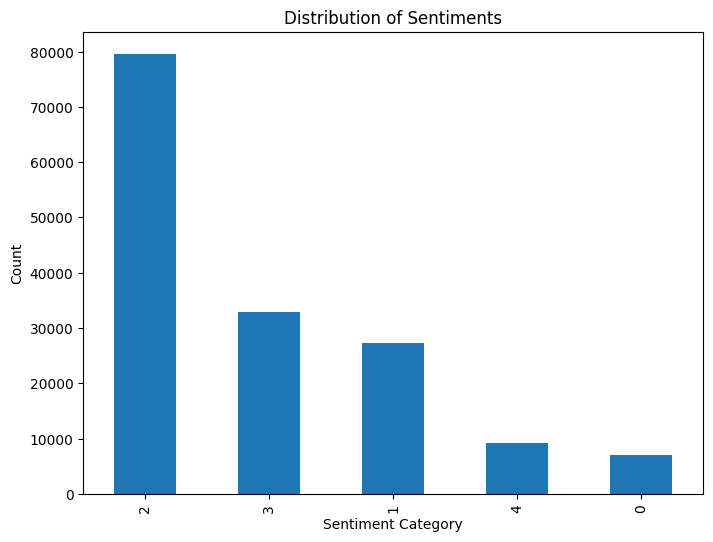

In [8]:
# Plot a histogram of sentiments by category
#'0: Negative', '1: Slightly Negative', '2: Neutral', '3: Slightly Positive', '4: Positive']
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Category',)
plt.ylabel('Count')
plt.show()

In [9]:
#Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize and remove symbols and numbers
# Initialize CountVectorizer, remove symbols and numbers, and tokenize
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{2,}\b')
X = vectorizer.fit_transform(data['Phrase'])

# Get feature names and document-term matrix
print(vectorizer.get_feature_names_out())
print(X.toarray())

['aaa' 'aaliyah' 'aan' ... 'zucker' 'zwick' 'zzzzzzzzz']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
#Split dataset (the test dataset represents 30% of the total data).
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.3, random_state=42)

In [11]:
#Import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function. Compute the model accuracy.
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy * 100:.2f}%")

Multinomial Naive Bayes Accuracy: 60.63%


In [12]:
# Creating a TF-IDF vectorizer and transforming the phrases
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{2,}\b')
# Fit and transform the 'Phrase' column
X_tfidf = tfidf_vectorizer.fit_transform(data['Phrase'])


# Create a Text Clasification model using TFI-DI
# Split dataset using TF-IDF features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, data['Sentiment'], test_size=0.3, random_state=42)
# Initialize the Multinomial Naive Bayes classifier
nb_classifier_tfidf = MultinomialNB()


# Fit the model on the training data (TF-IDF)
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Predict on the test set (TF-IDF)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)
# Compute the accuracy for TF-IDF model
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f"TF-IDF Multinomial Naive Bayes Accuracy: {accuracy_tfidf * 100:.2f}%")

TF-IDF Multinomial Naive Bayes Accuracy: 58.43%


EXERCISE-2

1. Create an account with IBM Cloud
2. Use IBM Watson Natural Language Understanding/Text Analysis to run the same
sentiment analysis as in Exercise 2.
3. Is there any difference in the results? What is IBM’s philosophy in sentiment
analysis?

In [13]:
pip install ibm-watson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.7 MB/s eta 0:00:00
  Created wheel for ibm-watson: filename=ibm_watson-8.1.0-py3-none-any.whl size=402519 sha256=0bc0c18ab7d2ea219583e8f96adbb4a4259b109e98556d0c7d950623737c8f36
  Stored in directory: /root/.cache/pip/wheels/9c/ec/3d/75dc52e05ee4b84284f9f481ccbb85260985823c6c7083bf16
Successfully built ibm-watson


In [17]:
#Use IBM Watson Natural Language Understanding/Text Analysis to run the sentiment analysis
#Importing the required libraries
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

#IBM Watson NLU API key and URL
api_key = 'MQ3UbHY-vxzCa0ba0ceb9ylPuQ1Phj7EkFjWQm2wQYxV'
url = 'https://api.us-east.natural-language-understanding.watson.cloud.ibm.com/instances/f71aa65f-df74-468f-aa5b-7178371d8195'

#Authenticate
authenticator = IAMAuthenticator(api_key)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)
natural_language_understanding.set_service_url(url)

#Input the article text
article = """
Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic
career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a
particularly serious charge in academia: In 2021, the president of the University of South
Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a
commencement speech. Plagiarism includes a broad range of possible offenses, from
improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to
allegations of research misconduct. Gay defended her academic record in an op-ed
published Wednesday in the New York Times, saying that she addressed attribution
issues promptly after learning about them, and that “I have never misrepresented my
research findings, nor have I ever claimed credit for the research of others. Moreover,
the citation errors should not obscure a fundamental truth: I proudly stand by my work
and its impact on the field.”
"""

#Analyze the sentiment of the article
response = natural_language_understanding.analyze(
    text=article,
    features=Features(sentiment=SentimentOptions())
).get_result()

#Print sentiment result
print(response['sentiment']['document'])


{'score': -0.620999, 'label': 'negative'}


EXERCISE-3

Use the following article from the Washington Post (1/5/24) to compute the sentiment
with a transformer model.

In [18]:
pip install transformers torch


In [19]:
#import required libraries
from transformers import pipeline

# Load pre-trained transformer model for sentiment analysis
sentiment_analysis = pipeline('sentiment-analysis',
                              model="distilbert-base-uncased-finetuned-sst-2-english",
                              revision="af0f99b")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
article_text = """
Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic
career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a
particularly serious charge in academia: In 2021, the president of the University of South
Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a
commencement speech. Plagiarism includes a broad range of possible offenses, from
improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to
allegations of research misconduct. Gay defended her academic record in an op-ed
published Wednesday in the New York Times, saying that she addressed attribution
issues promptly after learning about them, and that “I have never misrepresented my
research findings, nor have I ever claimed credit for the research of others. Moreover,
the citation errors should not obscure a fundamental truth: I proudly stand by my work
and its impact on the field.”
"""

# Perform sentiment analysis on the article
result = sentiment_analysis(article_text)
print(result)

[{'label': 'POSITIVE', 'score': 0.8526297211647034}]


FROM THE RESULTS:

IBM Watson NLU:

Score: -0.620999

Label: Negative

Previous Analysis:

Label: Positive

Score: 0.8526297211647034


**Differences in Results:**

**Sentiment Labels:** The IBM Watson analysis indicates a negative sentiment, while the previous analysis shows a positive sentiment. This is a significant discrepancy.

**Sentiment Scores:** The scores also reflect opposing sentiments: a negative score of approximately -0.62 versus a high positive score of about 0.85.

**Possible Reasons for Differences:**

**Algorithm Differences:** Different models may interpret the same text differently based on their training data and methodologies.

**Context Sensitivity:** Watson may be more sensitive to specific phrases or contexts that indicate negativity, which other tools might overlook.

**Text Complexity:** The complexity or ambiguity of the text can lead to varying interpretations among different sentiment analysis tools.

**IBM’s Philosophy in Sentiment Analysis
IBM’s approach to sentiment analysis is grounded in several key principles:**

**Contextual Understanding:** IBM Watson aims to understand the context in which words are used, recognizing that sentiment can be nuanced and vary significantly based on surrounding language.

**Machine Learning and NLP:** The use of advanced machine learning techniques allows IBM to improve the accuracy and relevance of its sentiment analysis over time.

**Customizability:** Users can train and customize the models to fit specific industries or applications, enhancing the relevance of the results.

**Ethics and Fairness:** IBM emphasizes building AI systems that are fair and transparent, ensuring that models are tested for biases and that they provide balanced assessments.

**Comprehensive Analysis:** Beyond just sentiment, IBM Watson analyzes multiple aspects of text, providing a more holistic view of the content being analyzed.